In this notebook we take a deeper look into the columnsof the data to see how we can use it best for our prediction.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train_values.csv')
target = pd.read_csv('train_labels.csv')

In [3]:
data = pd.merge(data, target, how='inner')

In [4]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


Let's take a deeper look into column 'Resting Blood Pressure'

In [5]:
blood_pres = data.groupby(['resting_blood_pressure', 'heart_disease_present']).count().iloc[:,0].reset_index()

Looking at the number of rows for each pair of 'resting_blood_pressure' and 'heart_disease_present' pairs

In [6]:
blood_pres.sort_values(by='patient_id', ascending=False)

,resting_blood_pressure,heart_disease_present,patient_id
26,130,0,15
16,120,0,13
37,140,0,13
27,130,1,11
38,140,1,9
17,120,1,8
9,110,1,6
50,160,0,5
45,150,1,5
44,150,0,5


In [7]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

With the below two graphs, we try to understand how does resting blood pressure correlate with the presence of heart disease

Text(0.5,1,'Blood Pressure when Heart Disease not Present')

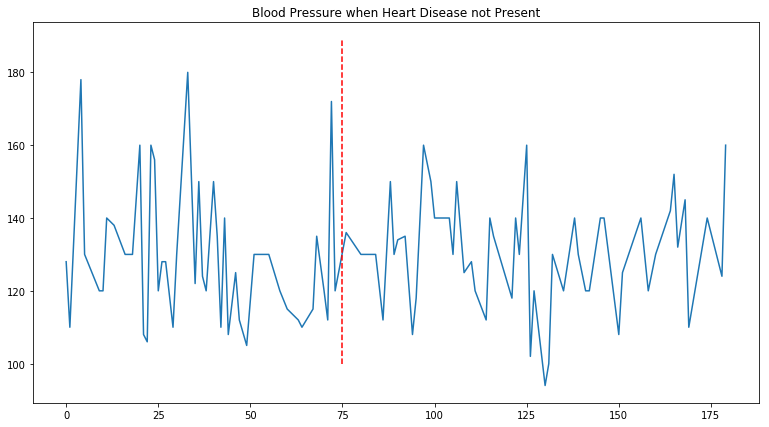

In [9]:
plt.figure(figsize=(13,7))
plt.plot(data[data['heart_disease_present']==0]['resting_blood_pressure'])
plt.plot([75] * 90, range(100, 190), ls = '--',color='red')
plt.title('Blood Pressure when Heart Disease not Present')

With the graph above, we see that the higher frequencies are on the left side of 75

In [10]:
data[data['heart_disease_present']==1]['resting_blood_pressure'].shape

(80,)

Text(0.5,1,'Blood Pressure when Heart Disease Present')

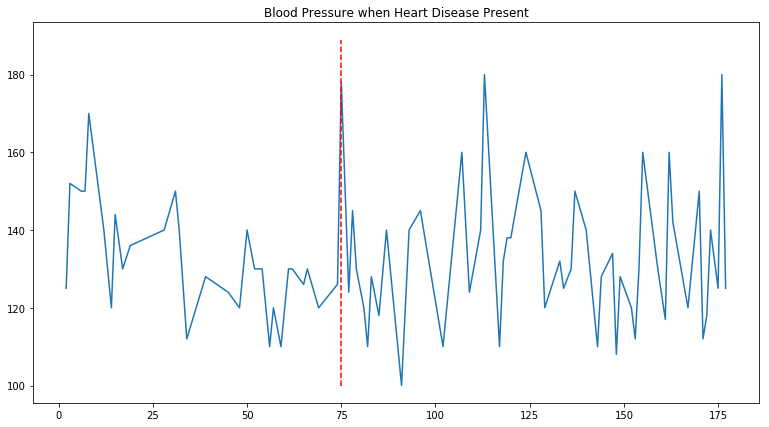

In [11]:
plt.figure(figsize=(13,7))
plt.plot(data[data['heart_disease_present']==1]['resting_blood_pressure'])
plt.plot([75] * 90, range(100, 190), ls = '--',color='red')
plt.title('Blood Pressure when Heart Disease Present')

And when the heart disease is present we see that higher frequencies are present on the right hand side of 75 blood pressure. <br><br>
Thus, we can safely create 2 classes for resting blood pressure: below 75 and above 75 to simplify our model
